# View Calspec SED 

- Author Sylvie Dagoret-Campagne
- Creation : 25 september 2019
- Update : October 7th 2019
- Update : April 20th 2020 for package PhotomCorrectAuxTel
- Last Verification : December 14th 2021 --> OK correct something related to string for python 3.9

In [37]:
import os
import numpy as np

In [38]:
from astropy.table import Table
from astropy.io import fits

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [40]:
import pysynphot as S

In [41]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')

In [42]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(24,18)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

# Read the Table

In [43]:
t=Table.read('table_summary_allcalspec.fits')
#t=Table.read('table_summary_calspec_hd.fits')  # view only HD type stars

In [44]:
print(t)

 OBJNAME      RA     DEC     SP_TYPE    SP_QUAL  magU   magB   magV   magR   magI              FILES             
---------- ------- ------- ------------ ------- ------ ------ ------ ------ ------ ------------------------------
    109VIR 221.562   1.893      A0IIInn       C  3.690  3.720  3.730  3.660  3.680           109vir_stis_002.fits
     10LAC 339.815  39.050          O9V       C  3.650  4.670  4.880  4.980  5.190            10lac_stis_005.fits
    16CYGB 295.455  50.525           --      --     --     --     --     --     --           16cygb_stis_002.fits
     18SCO 243.905  -8.369         G2Va       B     --  6.150  5.500     --     --            18sco_stis_002.fits
  HD172167 279.235  38.784         A0Va       C  0.030  0.030  0.030  0.070  0.100        alpha_lyr_stis_010.fits
 BD11D3759 218.570 -12.520        M3.5V       C 14.041 12.915 11.317 10.093  8.473        bd11d3759_stis_002.fits
   ETA1DOR  91.539 -66.040          A0V       C     --  5.679  5.690     --     --      

In [45]:
NBFILES=len(t)

In [46]:
# A flag to turn off plotting calspec
# In some cases the flag VISIBILITY may correspond to a flag saying if the star is visible
FLAG_VISIBILITY= [True] * len(t)

In [47]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBFILES), alpha=1)

# Flux in linear scale

----------- 109vir_stis_002.fits -------------------
----------- 10lac_stis_005.fits -------------------
----------- 16cygb_stis_002.fits -------------------
Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.
----------- 18sco_stis_002.fits -------------------
Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.
----------- alpha_lyr_stis_010.fits -------------------
----------- bd11d3759_stis_002.fits -------------------
Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
----------- eta1dor_stis_002.fits -------------------
----------- feige110_stisnic_008.fits -------------------
----------- feige34_stis_006.fits -------------------
----------- feige66_002.fits -------------------
----------- feige67_002.fits -------------------
----------- g191b2b_stiswfcnic_003.fits -------------------
----------- g93_48_004.fits -------------------
----------- gd108_005.fits -------------------
----------- gd153_s

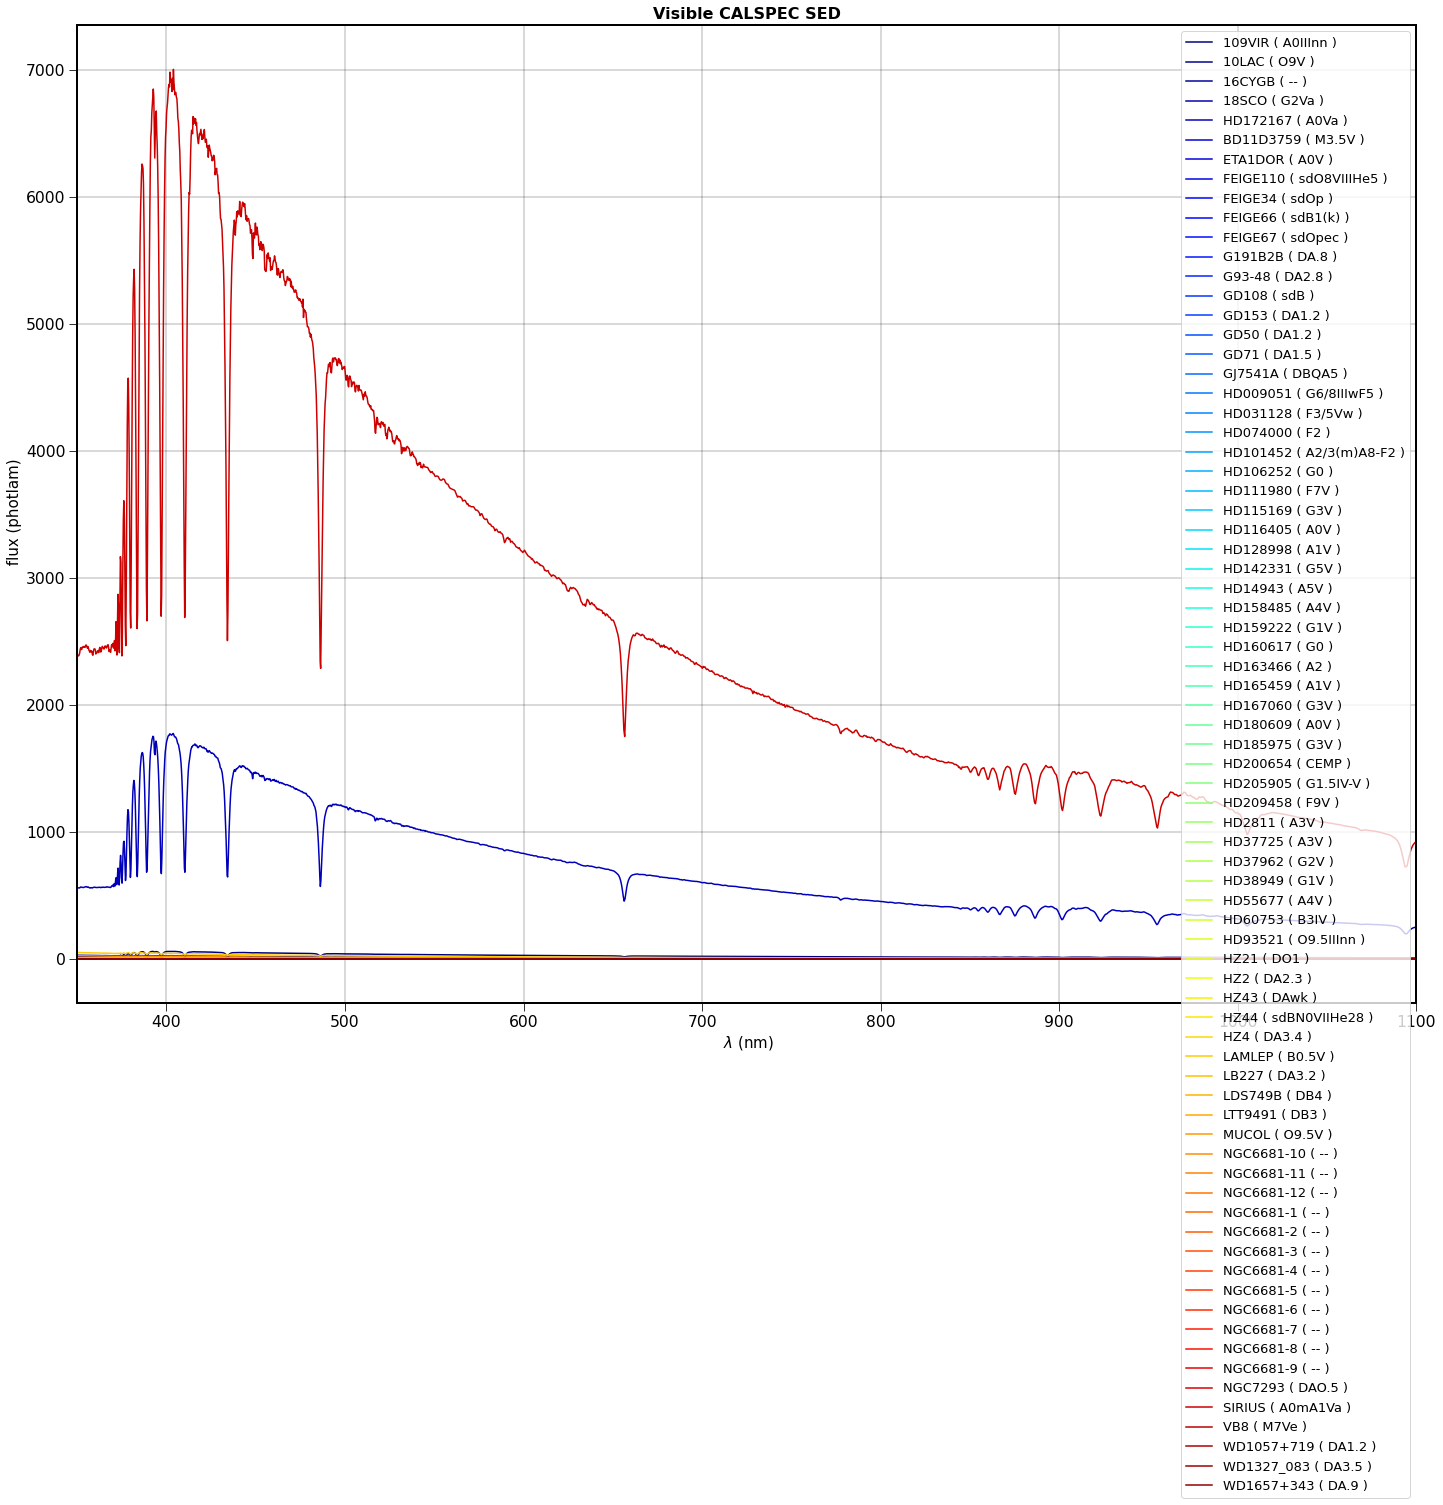

In [48]:
import re
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        
        
        print(f"----------- {filename} -------------------")
        
        #if (re.search("^ngc6681",filename) or re.search("ngc7293",filename) or re.search("^sirius",filename)
        #    or re.search("^vb8",filename) or re.search("^wd",filename) or re.search("^16cygb",filename) or
        #    re.search("^109vir",filename) or
        #    re.search("^10lac",filename) or
        #    re.search("^16cygb",filename) or
        #    re.search("^18sco",filename) or
        #    re.search("^eta1",filename)
        #   ):
        
        #    print(f"\t !!! SKIP {filename}, please check later what is wrong with this SED")
        #    continue
        
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')    
        
        label=str(t["OBJNAME"][idx]) + " ( " + str(t["SP_TYPE"][idx]) + " )"
        plt.plot(spec.wave, spec.flux,color=all_colors[idx],label=label)
        
    idx+=1
    
plt.xlim(350.,1100.)
#plt.ylim(0.,1.)
plt.legend()
plt.grid()

fign="all_viscalspec_spectra_lin.pdf"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' flux ({})'.format(spec.fluxunits.name)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Visible CALSPEC SED")
plt.grid(color="k")
plt.savefig(fign)

# Show relative flux renormalised to flux at 500 nm in linear scale

Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 17 of 6234 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6256 bins contained negative fluxes; they have been set to zero.
Warning, 29 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 64 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 62 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 34 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 18 of 6261 bins contained negative fluxes; they have been set to zero.
Warning, 47 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 30 of 6673 bins contained negativ

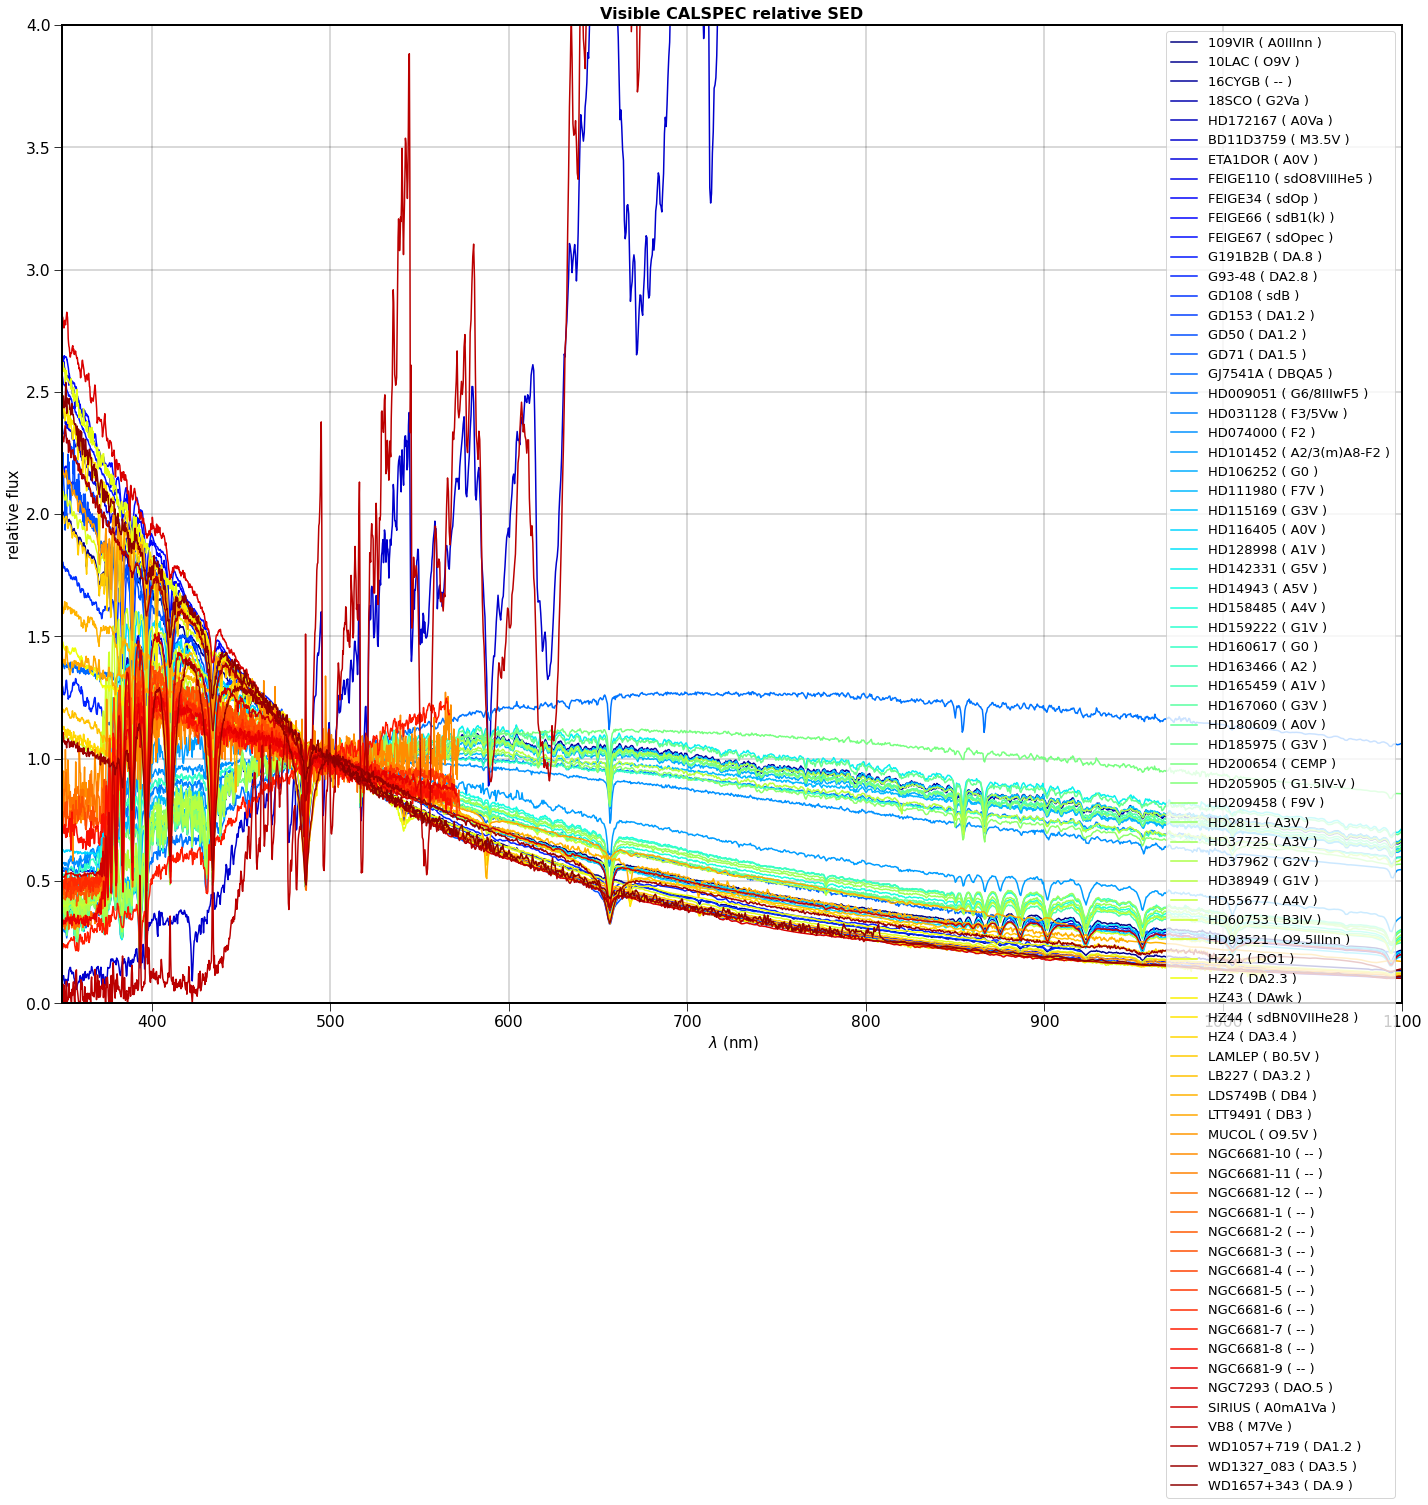

In [49]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')    
        
        # wavelength bin at 500 nm
        #-----------------------------
        wl_idx=np.argmin(np.abs(spec.wave-500))
        
        label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )"
        
        plt.plot(spec.wave, spec.flux/spec.flux[wl_idx],color=all_colors[idx],label=label)
        
    idx+=1
    
plt.xlim(350.,1100.)
plt.ylim(0.,4.)
plt.legend()
plt.grid()

fign="all_viscalspec_relspectra_lin.pdf"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' relative flux '
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Visible CALSPEC relative SED")
plt.grid(color="k")
plt.savefig(fign)

In [50]:
np.argmin(np.abs(spec.wave-500))

2523

In [51]:
spec.wave[2161]

400.6089844

# Flux in log scale

Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 17 of 6234 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6256 bins contained negative fluxes; they have been set to zero.
Warning, 29 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 64 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 62 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 34 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 18 of 6261 bins contained negative fluxes; they have been set to zero.
Warning, 47 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 30 of 6673 bins contained negativ

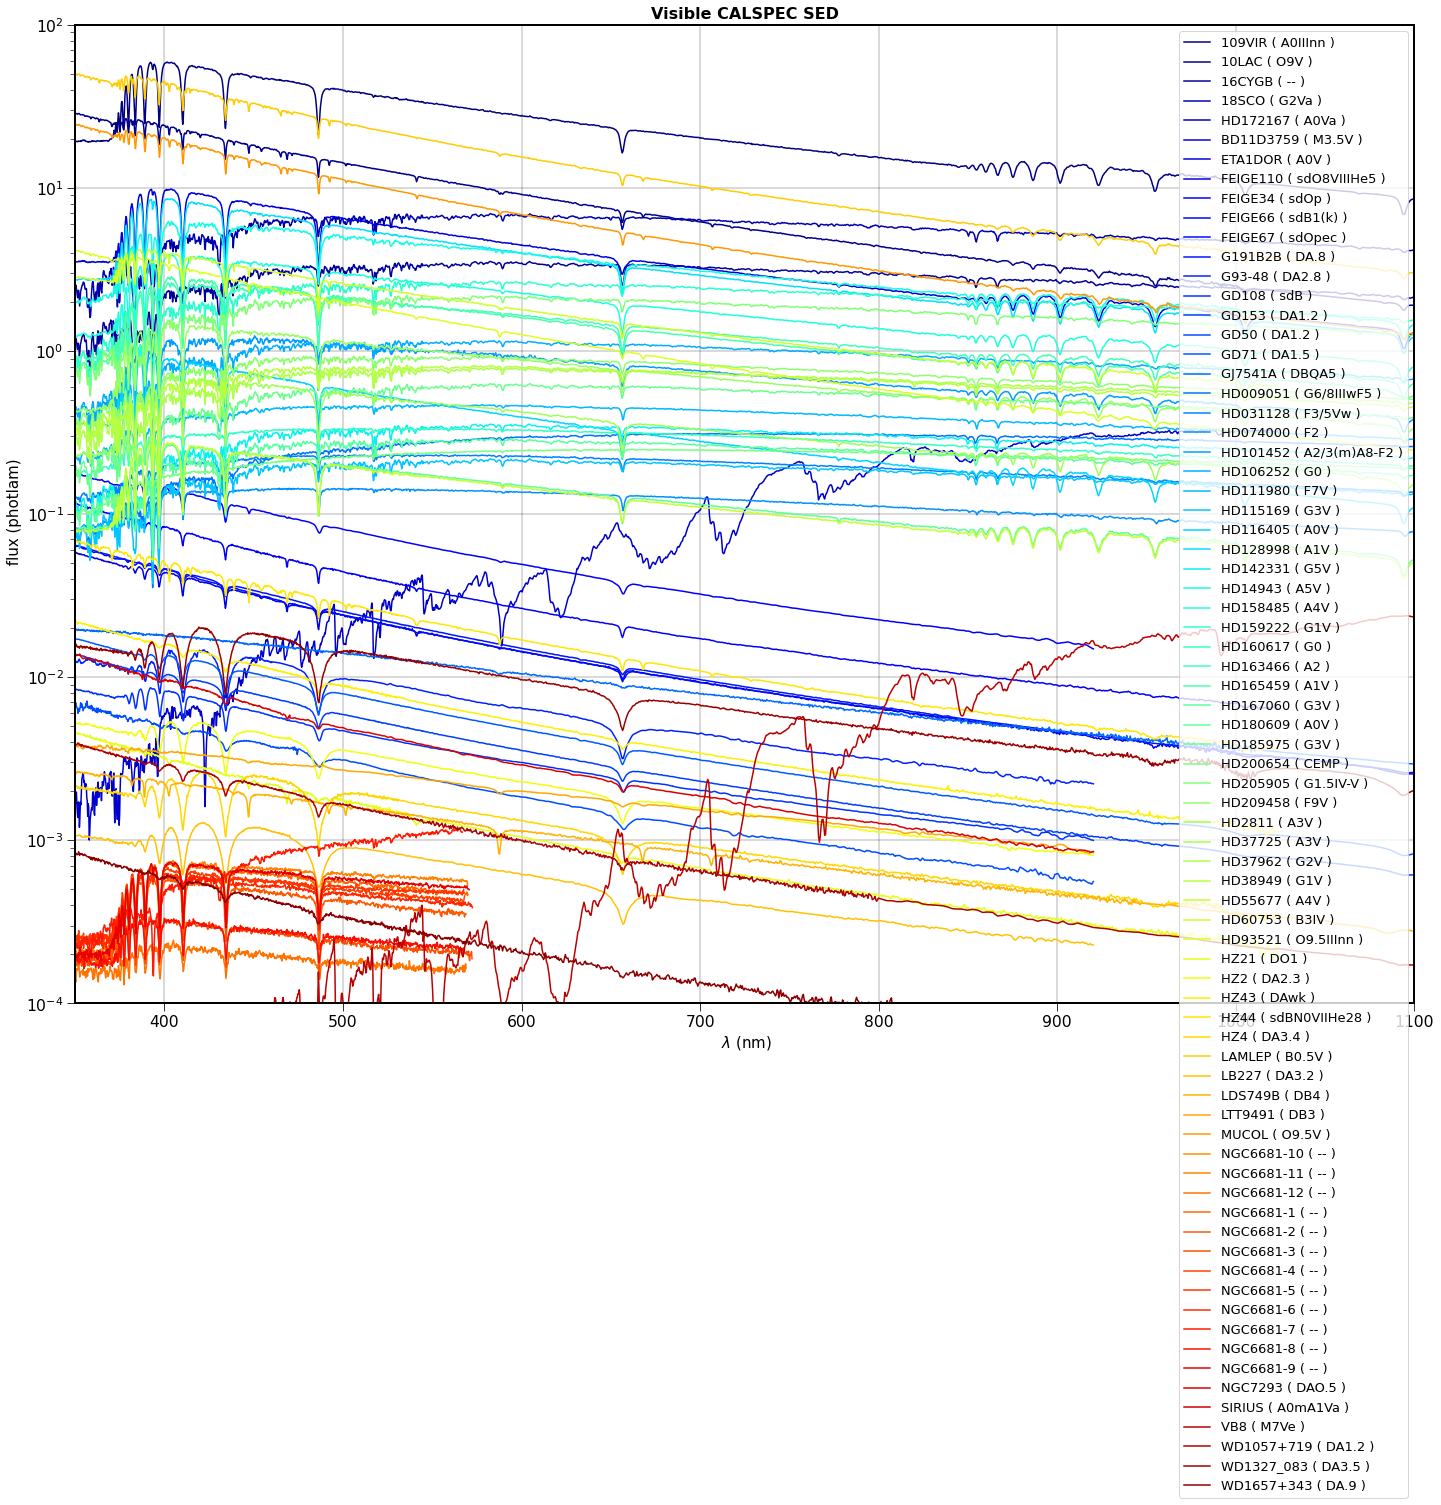

In [52]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')    
        
        label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )"
            
        plt.semilogy(spec.wave, spec.flux,color=all_colors[idx],label=label)
        
    idx+=1
    
plt.xlim(350.,1100.)
plt.ylim(.0001,100.)
#plt.ylim(0.,1.)
plt.legend()
plt.grid()

fign="all_viscalspec_spectra_log.pdf"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' flux ({})'.format(spec.fluxunits.name)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Visible CALSPEC SED")
plt.grid(color="k")
plt.savefig(fign)